# Validate Results

In [1]:
import os
import sys
import warnings
import pandas as pd

warnings.filterwarnings('ignore')
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname('src'), '..')))

from src.logger import log
from src.constants import *
from src.data import torus, preprocess, get_all_datasets
from src.missingness import MISSINGNESS
from src.tda import TDA
from src.normalize import normalize_by_diameter
from src.visualize import *
from src.statistical_analysis import test_against_baseline

## Introduced Missing Rate
Check wether the proportion of missing values in each dataset matches the desired missing rate

In [4]:
datasets = get_all_datasets()
missing_rates = [1, 2, 3, 4, 5, 6, 8, 10, 15, 20, 25, 30, 40]
for id, dataset in datasets.items():
    for missing_rate in missing_rates:
        data_miss = {
            MCAR: MISSINGNESS[MCAR][FUNCTION](dataset[DATA], dataset[TARGET], missing_rate, SEEDS[0]),
            MAR: MISSINGNESS[MAR][FUNCTION](dataset[DATA], dataset[TARGET], missing_rate, SEEDS[0]),
            MNAR: MISSINGNESS[MNAR][FUNCTION](dataset[DATA], dataset[TARGET], missing_rate, SEEDS[0])
        }
        for key, value in data_miss.items():
            assert (missing_rate / 100) == round(value.isna().sum().sum() / value.size, 3)
    log(f'Missing data in {LABEL[id]} created successfully.')

[2025-07-09 00:43:47] | Missing data in Stock Dataset created successfully.
[2025-07-09 00:44:11] | Missing data in RMFTSA LA Data created successfully.
[2025-07-09 00:44:35] | Missing data in Concrete Data created successfully.
[2025-07-09 00:44:59] | Missing data in Treasury created successfully.
[2025-07-09 00:45:23] | Missing data in Weather Izmir created successfully.
[2025-07-09 00:45:47] | Missing data in Hungarian Chickenpox created successfully.
[2025-07-09 00:46:12] | Missing data in CNN Stock Prediction DJI created successfully.
[2025-07-09 00:46:36] | Missing data in Diabetes Dataset created successfully.
[2025-07-09 00:47:00] | Missing data in Red Wine Quality created successfully.
[2025-07-09 00:47:24] | Missing data in Torus (Synthetic) created successfully.
[2025-07-09 00:47:49] | Missing data in On & On (NCS) created successfully.


## Correlation between missing data
Checks whether missingness patterns align with the intended mechanism by visualizing correlations between feature-wise missing values using a heatmap.

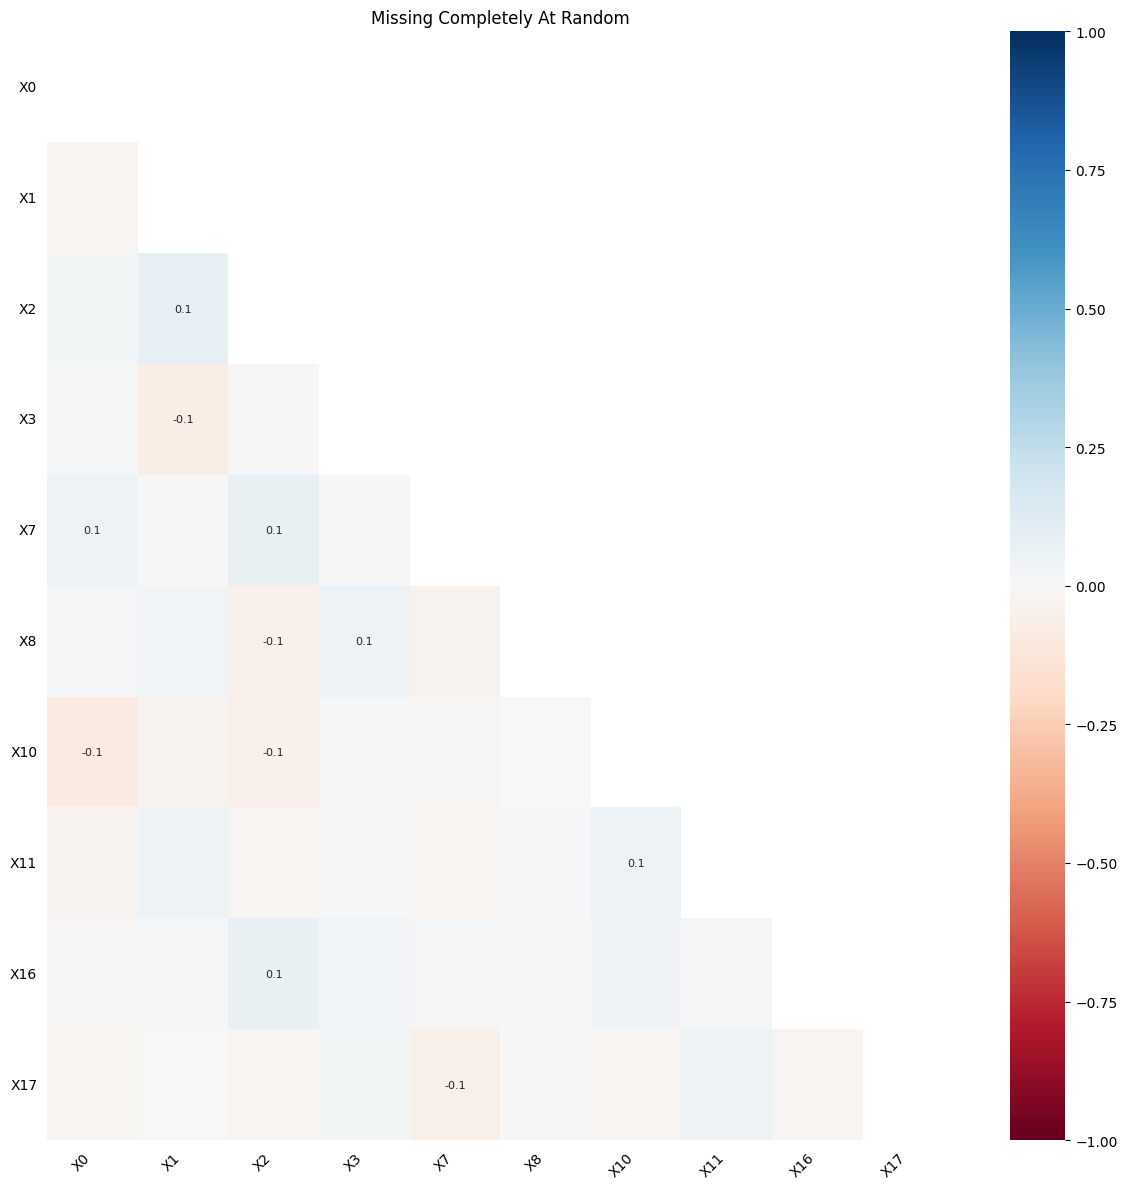

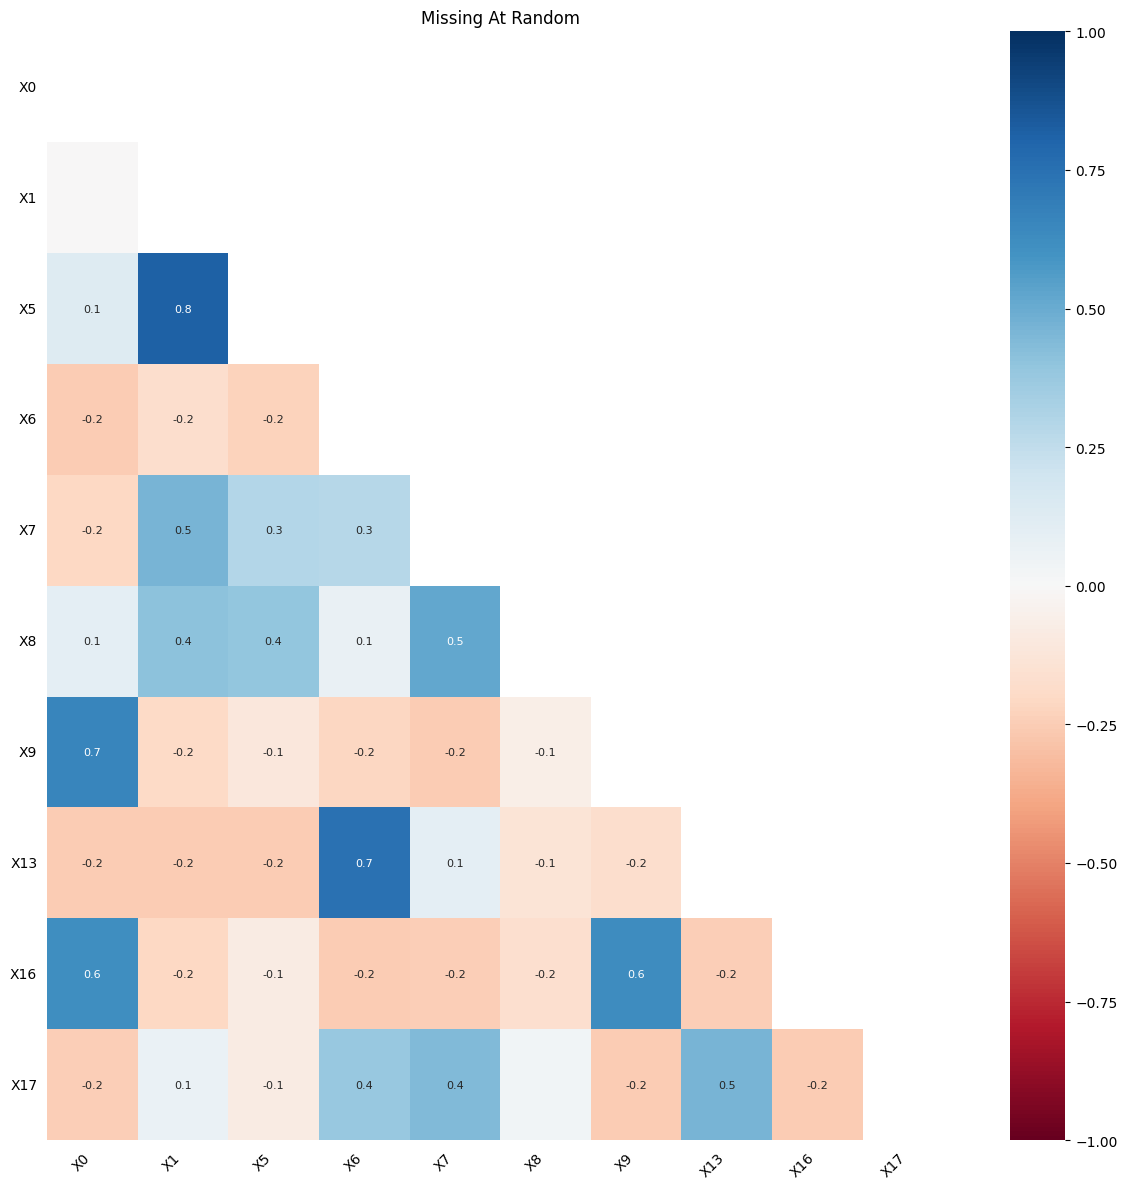

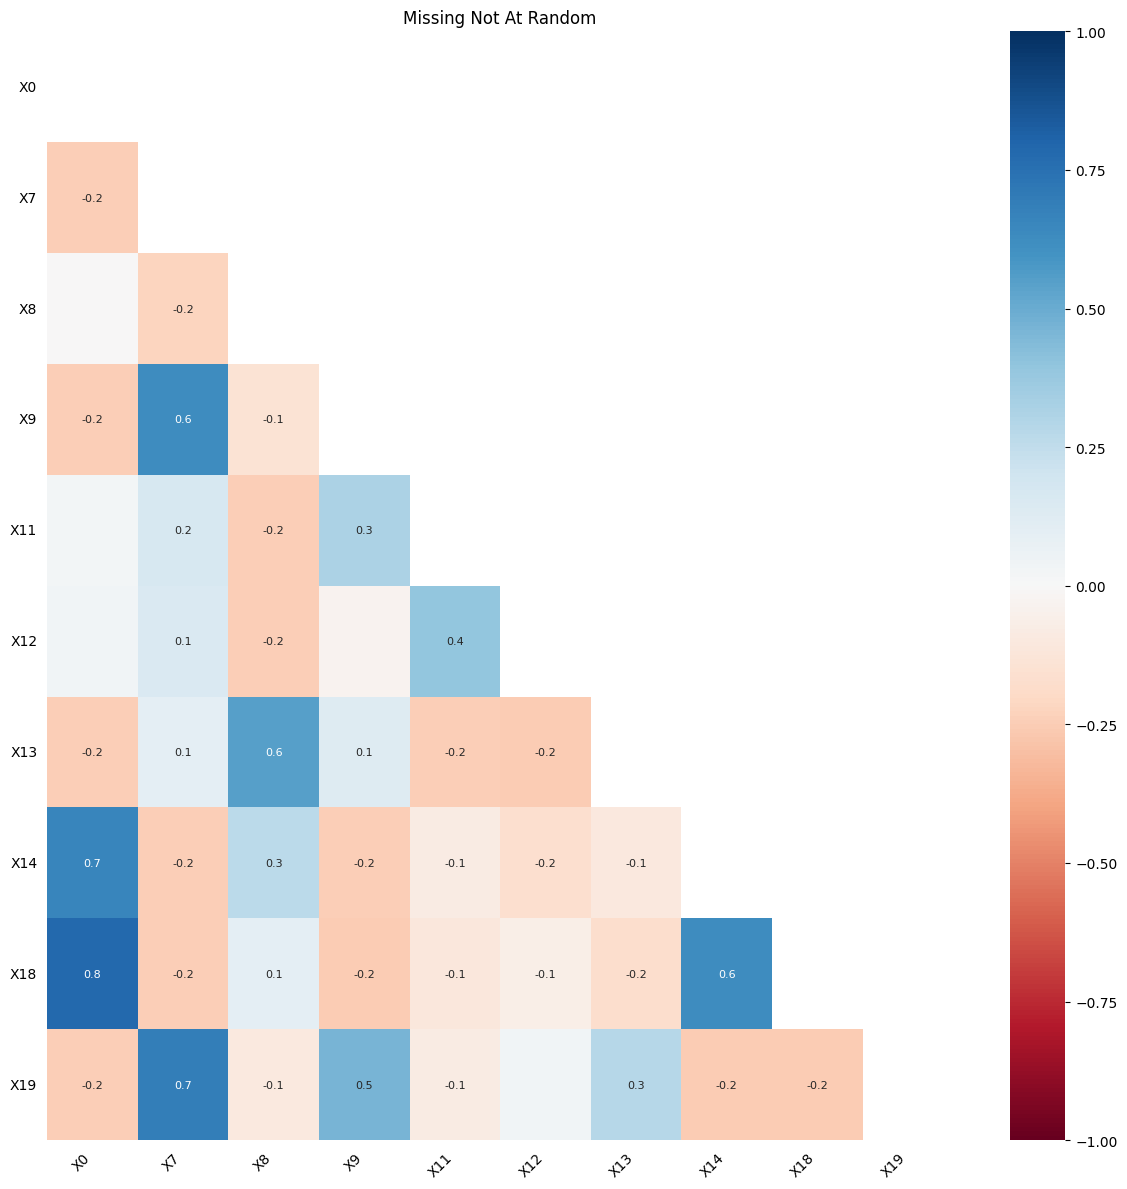

In [ ]:
missing_rate = 10
dataset = preprocess(torus(), TORUS)
data_miss = {
    MCAR: MISSINGNESS[MCAR][FUNCTION](dataset[DATA], dataset[TARGET], missing_rate, SEEDS[0]),
    MAR: MISSINGNESS[MAR][FUNCTION](dataset[DATA], dataset[TARGET], missing_rate, SEEDS[0]),
    MNAR: MISSINGNESS[MNAR][FUNCTION](dataset[DATA], dataset[TARGET], missing_rate, SEEDS[0])
}
for key, value in data_miss.items():
    plot_missing_data(value, dataset[DATA], LABEL[key])

## Distance vs Missingrate
Plots how distances between original and imputed data change with increasing missing rates, helping to verify whether the data exhibits expected natural characteristics.

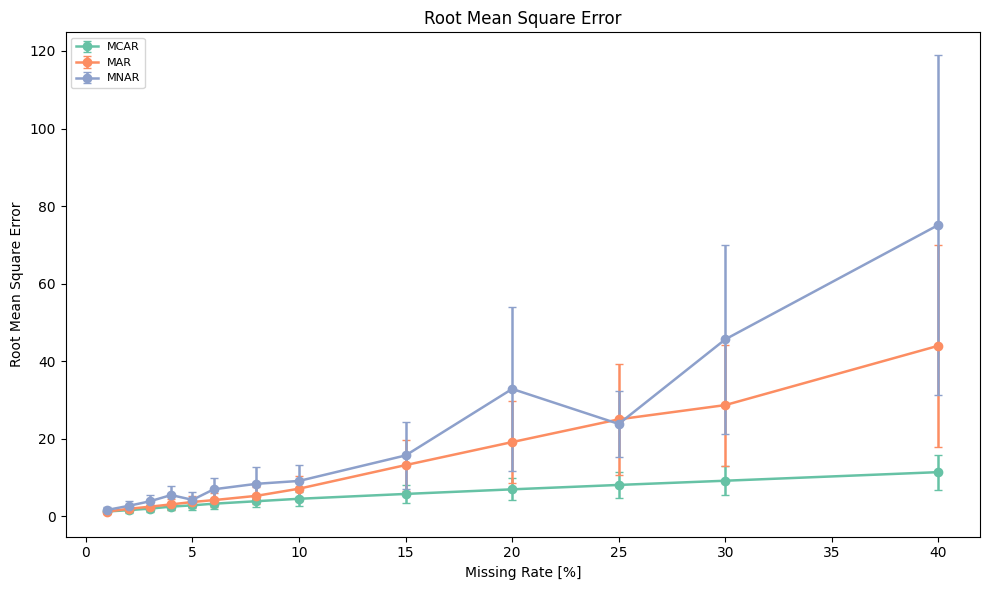

In [3]:
plot_rmse_vs_missingrate()

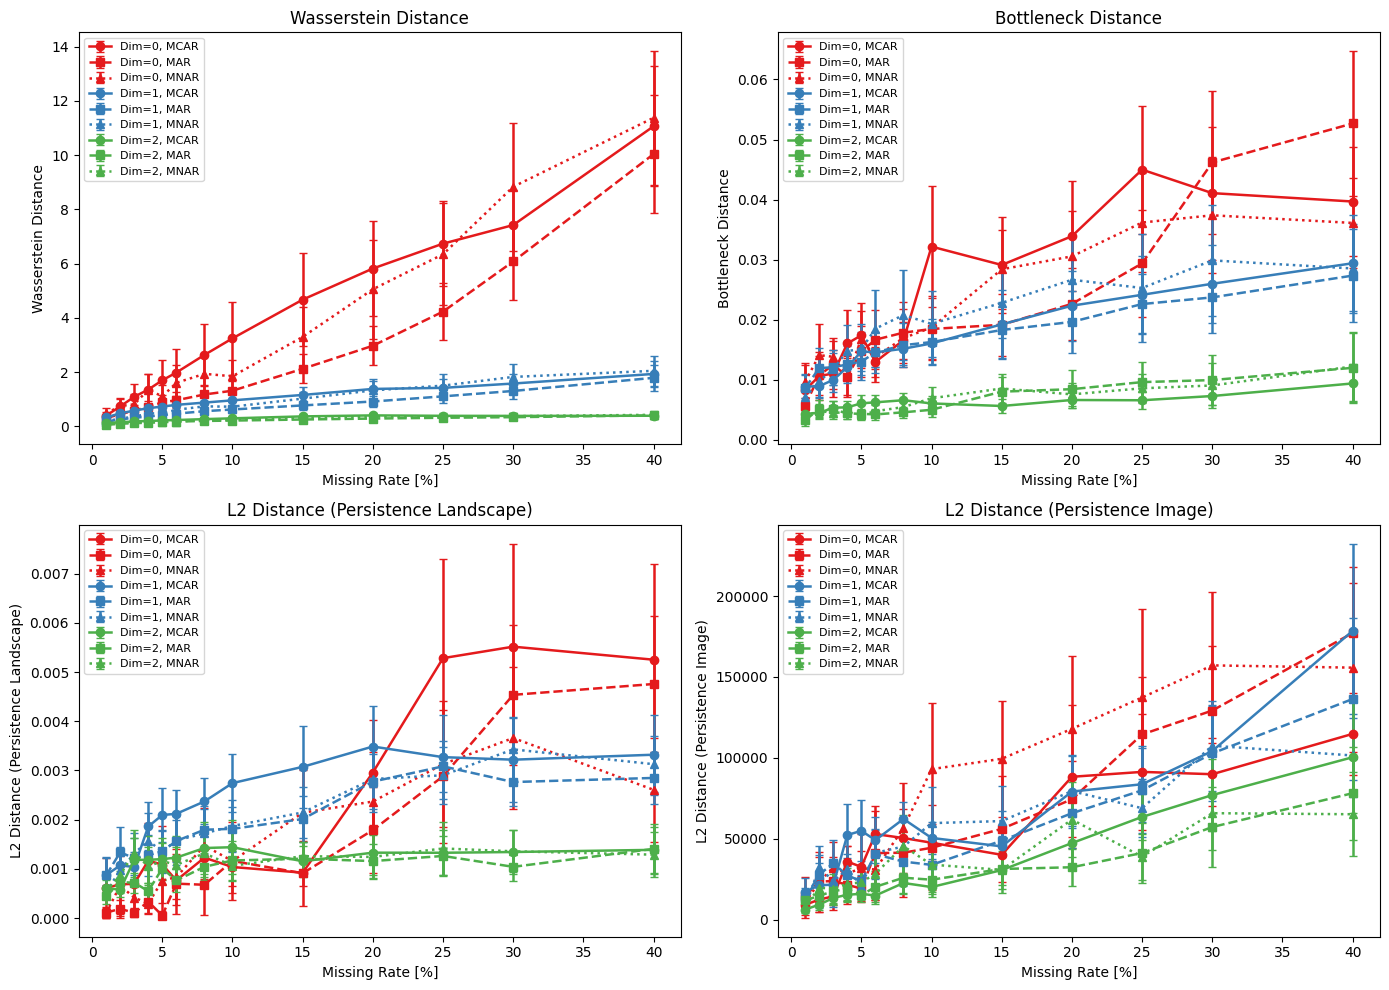

In [3]:
plot_distance_vs_missingrate_by_dim_and_type()

## Constant Imputation as Baseline Method

In [ ]:
data = pd.read_csv(RMSE_RESULTS)
result = test_against_baseline(
    data=data,
    dependent_var=RMSE,
    independent_var=IMPUTATION_METHOD,
    baseline_var=CONSTANT,
    groups=[DATASET]
)
table(result.round(4), [LABEL[IMPUTATION_METHOD], 'Number of Pairs', 'Mean Difference', 'Wilcoxon Statistic', 'p-Value'],)

|    | Imputation Method                        |   Number of Pairs |   Mean Difference |   Wilcoxon Statistic |   p-Value |
|----|------------------------------------------|-------------------|-------------------|----------------------|-----------|
|  0 | K Nearest Neighbors Imputation           |                10 |          -29.2238 |                    0 |    0.002  |
|  1 | Mean Imputation                          |                10 |          -16.3573 |                   11 |    0.1055 |
|  2 | Median Imputation                        |                10 |          -16.5733 |                   11 |    0.1055 |
|  3 | Multiple Imputation by Chained Equations |                10 |          -28.1953 |                    4 |    0.0137 |
|  4 | Random Forest Imputation                 |                10 |          -28.8026 |                    0 |    0.002  |

## Calculate Persistence Intervals

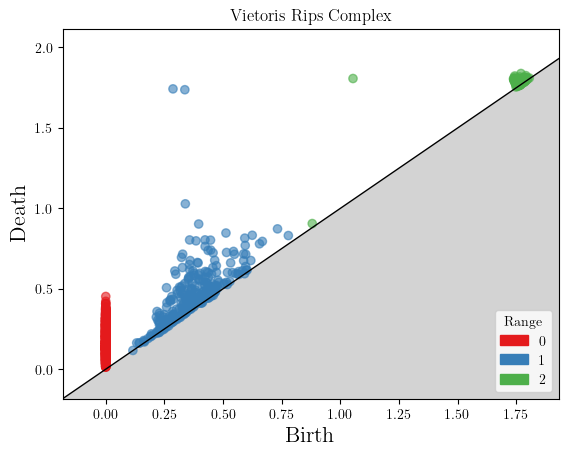

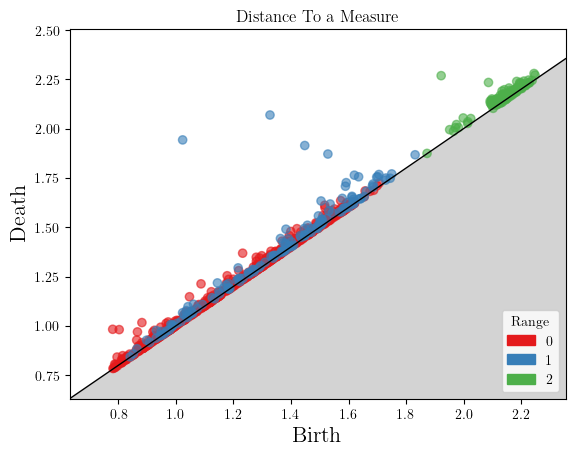

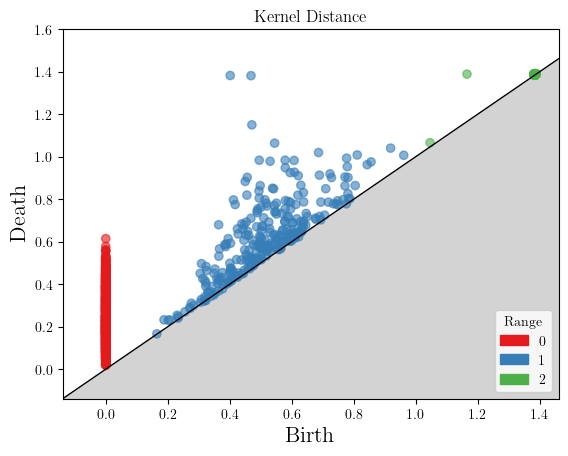

In [7]:
dataset = preprocess(torus(), TORUS)
persistence_intervals = {
    VR: TDA[VR][FUNCTION](dataset[DATA]),
    DTM: TDA[DTM][FUNCTION](dataset[DATA]),
    KD: TDA[KD][FUNCTION](dataset[DATA])
}
for tda_method in COLLECTIONS[TDA_METHOD]:
    plot_persistence_diagram(persistence_intervals[tda_method], LABEL[tda_method])

## Normalized Persistence Intervals

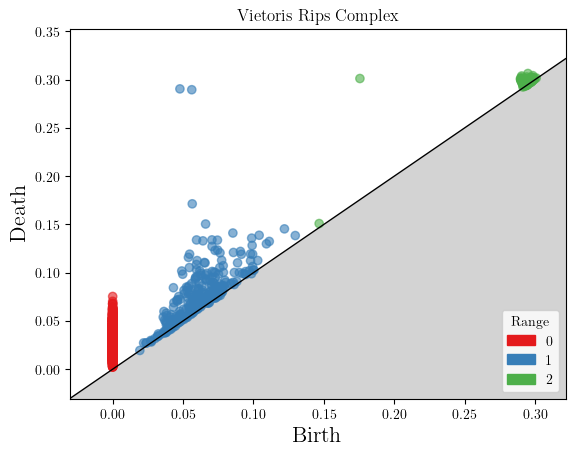

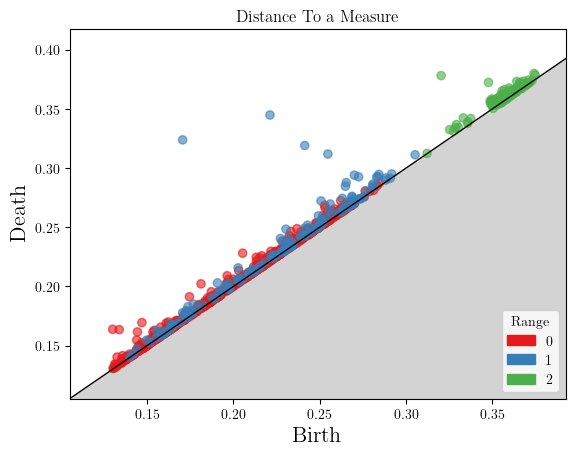

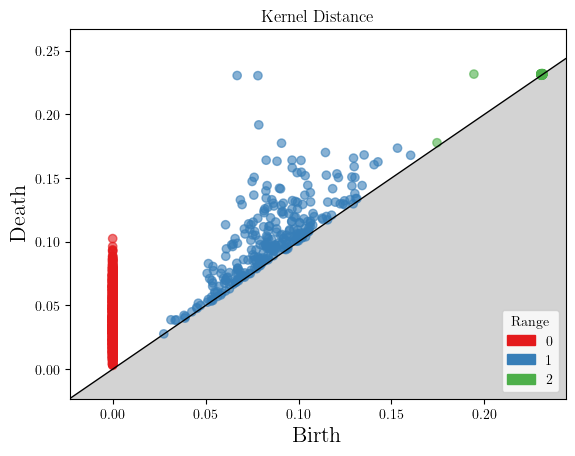

In [8]:
normalized_persistence_intervals = {
    VR: normalize_by_diameter(persistence_intervals[VR], dataset[DATA]),
    DTM: normalize_by_diameter(persistence_intervals[DTM], dataset[DATA]),
    KD: normalize_by_diameter(persistence_intervals[KD], dataset[DATA]),
}

for tda_method in COLLECTIONS[TDA_METHOD]:
    plot_persistence_diagram(normalized_persistence_intervals[tda_method], LABEL[tda_method])